In [1]:
# to access google drive folder
from google.colab import drive
drive.mount('/content/drive') # When you run this you'll be prompted for a token - follow the link to generate this.

Mounted at /content/drive


# Load the data

The data is stored in numpy data files. 
**Note: Path to files should be changed depending on location.**

In [2]:
import numpy as np

train_X = np.load("/content/drive/MyDrive/data/train_x.npy", allow_pickle=True)
train_y = np.load("/content/drive/MyDrive/data/train_y.npy", allow_pickle=True)

validate_X = np.load("/content/drive/MyDrive/data/valid_x.npy", allow_pickle=True)
validate_y = np.load("/content/drive/MyDrive/data/valid_y.npy", allow_pickle=True)

test_x = np.load("/content/drive/MyDrive/data/test_x.npy", allow_pickle=True)
test_y = np.load("/content/drive/MyDrive/data/test_y.npy", allow_pickle=True)

In [8]:
# Check the shape of the data
test_x.shape

(10000, 3, 28, 28)

In [9]:
count = train_X.shape[0]
print(count)

45000


# Functions to plot the data

In [10]:
import matplotlib.pyplot as plt

def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

def show_mnist_examples(x, y):
    fig = plt.figure(constrained_layout=True,figsize=(12,9), dpi=100)
    gs = fig.add_gridspec(3,4)
    main_ax = fig.add_subplot(gs[:3,:3])
    fig.suptitle(y)
    #main_ax.imshow(np.moveaxis(x, 0, -1)).imshow(x)
    main_ax.imshow(image_normalization(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)

    for j in range(3):
      c_ax = fig.add_subplot(gs[j,-1])
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      c_ax.imshow(image_normalization(np.moveaxis(subimage, 0, -1)))
      disable_ax_ticks(c_ax)
    plt.show()

# Plot random rgb image

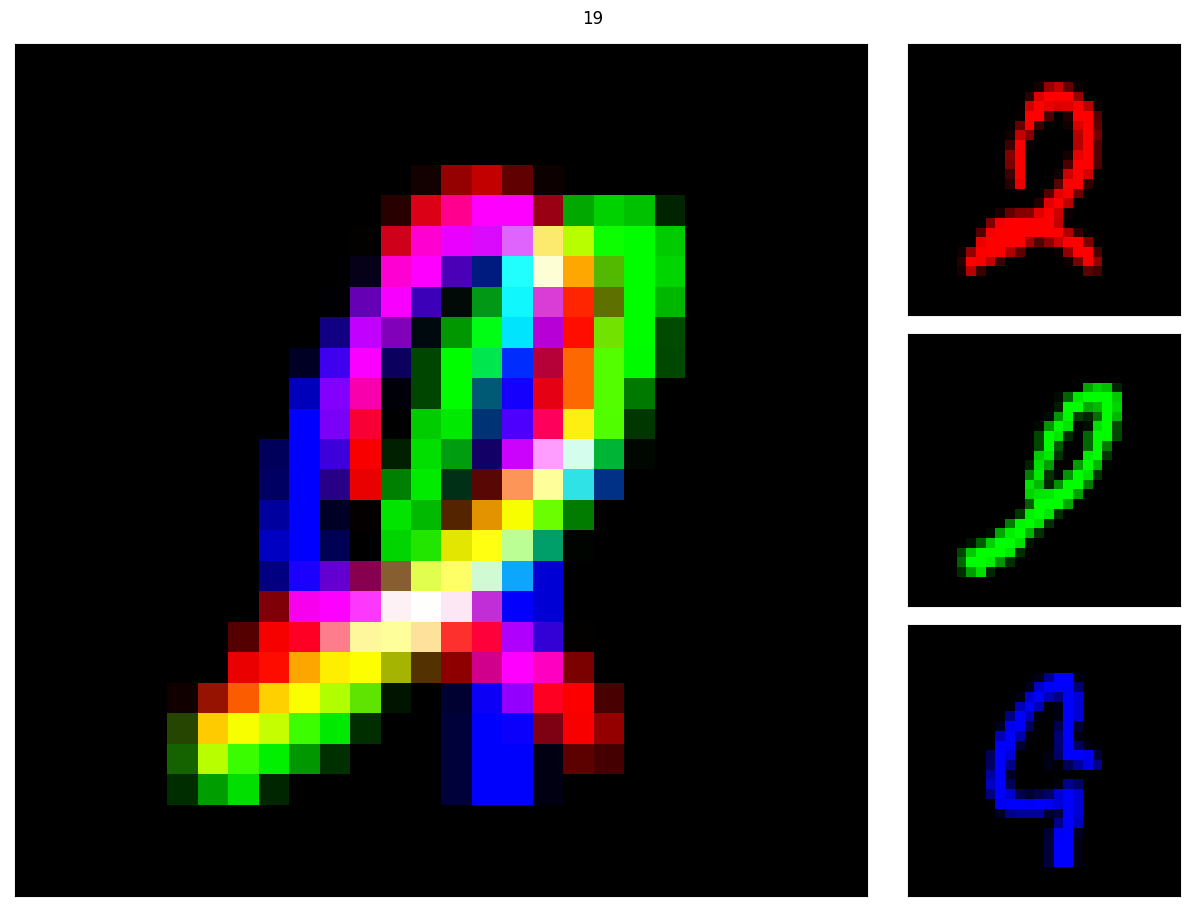

In [17]:
import random

ri = random.randrange(count)
show_mnist_examples(train_X[ri], train_y[ri])